In [54]:
from os.path import dirname, join as pjoin
from collections import Counter
import matplotlib.pyplot as plt
import scipy.io as sio
import os
import glob
from scipy.signal import find_peaks
import numpy as np
import pandas as pd



# Extract .mat file

In [55]:
def readMatFolder(folderPath):
    fileFolder=[]

    files = os.listdir(folderPath)
    for filename in glob.glob(os.path.join(folderPath, '*.mat')):
        data = sio.loadmat(filename)
        fileFolder.append(data)
    return fileFolder,files
    
testMatFileVect,files = readMatFolder("../VibrationPart/Vib_ProjetM1_IA/Vib_ProjetM1_IA/Condition_fixe/P1/Vibration/RB/")



3 chanels

In [56]:
testMatFileVect[0]["data_raw"][:, 0]

array([0.07678618, 0.07053964, 0.09172357, ..., 0.04813356, 0.03699841,
       0.04297337])

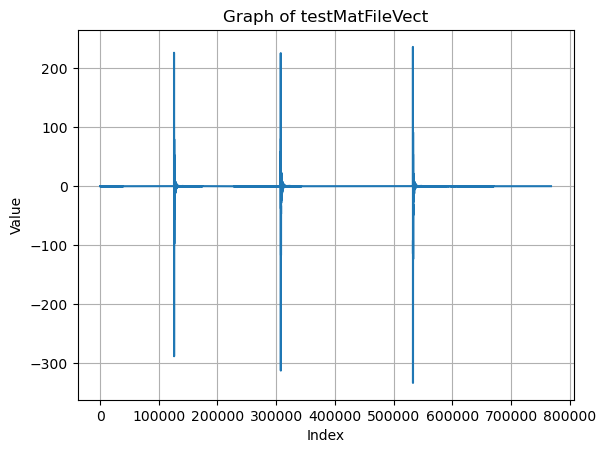

In [57]:
plt.plot(testMatFileVect[0]["data_raw"][:, 0])
plt.title("Graph of testMatFileVect")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

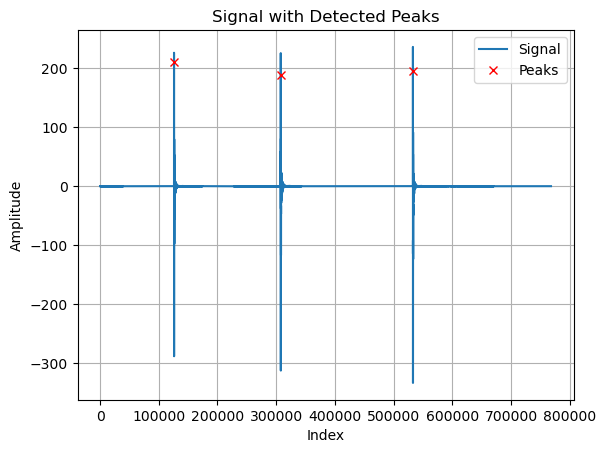

In [58]:
def detectImpacts(signalFile,smoothing=50,min_distance = 1000):
    # Ensure the signal is a 1-D array
    signalFile = signalFile.flatten()
    # Smooth the signal using a moving average filter
    window_size = smoothing  # Define the window size for smoothing
    smoothed_signal = np.convolve(signalFile, np.ones(window_size)/window_size, mode='same')
    signalFile = smoothed_signal
    # Find peaks in the signal
    peaks, _ = find_peaks(signalFile,100)
    # Remove close peaks
    filtered_peaks = []
    for i in range(len(peaks)):
        if i == 0 or peaks[i] - peaks[i - 1] > min_distance:
            filtered_peaks.append(peaks[i])
    peaks = np.array(filtered_peaks)
    
    return peaks

signalFile=testMatFileVect[0]["data_raw"][:, 0]

detectImpacts(signalFile,400)

# Plot the signal
plt.plot(signalFile, label="Signal")

# Detect peaks
peaks = detectImpacts(signalFile,)

# Highlight the peaks
plt.plot(peaks, signalFile[peaks], "x", label="Peaks", color="red")

# Add labels and legend
plt.title("Signal with Detected Peaks")
plt.xlabel("Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Split data

In [67]:
def split_data(signal,peaksPosition,signalName,folder="./",marginL=400,marginR=2000):
    index=0
    for peakPosition in peaksPosition:
        index+=1
        split_signal=signal[peakPosition-marginL:peakPosition+marginR]
        df = pd.DataFrame(split_signal)
        print(df)
        df.to_csv(folder+signalName+"ImpactN"+str(index)+'.csv', index=False)

split_data(signalFile,peaks,"./Data_Clean/test/test")

In [60]:
def read_and_plot_csv(file_path):
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path)

    # Plot the signal
    plt.plot(data)
    plt.title("Signal from CSV")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()
    
# read_and_plot_csv("./signalName125980.csv")
# read_and_plot_csv("./signalName307759.csv")



# Main

In [82]:
MatFileList,filesNamesList = readMatFolder("../VibrationPart/Vib_ProjetM1_IA/Vib_ProjetM1_IA/Condition_fixe/P1/Vibration/RB")

In [84]:
print(len(MatFileList))
for i in range(len(MatFileList)):
    signalFile=testMatFileVect[i]["data_raw"][:, 1]
    peaks=detectImpacts(signalFile)
    folder="./Data_Clean/Chanel0.1.2_RawData/P1_clean/"
    split_data(signalFile,peaks,filesNamesList[i]+"ch_1",folder=folder)

    




18


In [63]:
import glob

# Get all CSV files in the folder
file_paths = glob.glob(folder + "*.csv")

# Function to read and plot multiple CSV files
def read_and_plot_csv_small(file_paths):
    num_files = len(file_paths)
    fig, axes = plt.subplots(num_files, 1, figsize=(10, 3 * num_files))
    
    for i, file_path in enumerate(file_paths):
        data = pd.read_csv(file_path)
        axes[i].plot(data)
        axes[i].set_title(f"Signal from {file_path}")
        axes[i].set_xlabel("Index")
        axes[i].set_ylabel("Value")
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()

# Call the function with the file paths
read_and_plot_csv_small(file_paths)

ValueError: Number of rows must be a positive integer, not 0

<Figure size 1000x0 with 0 Axes>